# Decision Trees

In this lab you will learn the most important aspects of the decision tree learning method. 
Completing this lab and analyzing the code will give you a deeper understanding of these type of models.
In our experiments we will mostly use the package sklearn from which we import DecisionTreeClassifier.

## Problem Setting

First of all, we calculate by hand the impurity measure of splitting some data by some criteria $q$ which in our case is given by a threshold t. Remember, that information gain is calculated as follows: 
$$IG(q) = S_{0} - \sum_{i=1}^{k}\frac{N_{i}(q)}{N}S_{i}(q)$$
where $k$ is the number of groups after partition; $N$ is the total number of examples; $N_{i}(q)$ is the number of examples in the group $i$ and $S$ is the (Shannon) entropy function defined as:
$$S = - \sum_{i}^{}\hat{p}_{i}\log(\hat{p}_{i}),$$
where $\hat{p}_{i}$ is the empirical frequency that the randomly chosen object has label $i$.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from numpy.testing import assert_almost_equal
from matplotlib import pyplot as plt

%matplotlib inline

## Entropy
<b>Exercise 1:</b>

Write a function that calculates the entropy defined as: $$S = - \sum_{i}^{}\hat{p}_{i}\log(\hat{p}_{i}),$$. <b>Hint:</b> The function input is a vector of labels and the function should return the entropy.

In [2]:
def entropy(labels):
    value,counts = np.unique(labels, return_counts=True)
    norm_counts = counts / counts.sum()
    ent_pos = sum(norm_counts * np.log2(norm_counts))
    if ent_pos != 0:
        return - ent_pos
    else:
        return 0.

Check if your solution is correct:

In [3]:
try:
    assert_almost_equal (entropy(np.array([1,1,0,0])), 1.)
    assert_almost_equal (entropy(np.array([0,0])), 0.)
    assert_almost_equal (entropy(np.array([1,1,0,0,1,1])), 0.9182957410812378)
    print("Testing successful.")
except:
    print("Tests failed.")

Testing successful.


## Information Gain

<b> Exercise 2:</b>
Write a function that calculates the information gain obtained by setting the threshold $t\in \mathbb{R}$ for data points $x \in \mathbb{R}^{d}$ with label $y\in \mathbb{N}^{d}$. <b>Hint:</b> The function input is a vector x of attribut values, a vector y of labels and a threshold. The function should return the information gain for that specific split.

<b>Example</b>: A split at threshold $t=2$ for data points $x = [1,2,3,4,5]$ and label $y=[1,0,0,0,0,0]$ would result in the lists 
* $x_{left} = [3,4,5]$, $y_{left} = [0,0,0]$ (for $x > t$) and
* $x_{right} = [1,2]$, $y_{right} = [1,0]$ (for $x <= t$).
* Computation of information gain: $\textbf{entropy}([1,0,0,0,0,0]) - (0.6 * \textbf{entropy}([0,0,0]) + (0.4 * \textbf{entropy}([1,0]))$

In [121]:
def info_gain(x,y,t):
    y_left = [y for (x,y) in zip(x,y) if x > t] 
    y_right = [y for (x,y) in zip(x,y) if x <= t] 
    ent = entropy(y) - (len(y_left)/len(y) * entropy(y_left) + (len(y_left)/len(y)) * entropy(y_right))
    return float("{0:.4f}".format(ent))

Check if your solution is correct:

In [126]:
try:
    assert_almost_equal (info_gain(np.array([1,2,3,4,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0]),1), 0.1080)
    assert_almost_equal (info_gain(np.array([1,2,3,4,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0]),3), 0.3958)
    assert_almost_equal (info_gain(np.array([1,2,3,4,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0]),5), 1.)
    
    #assert_almost_equal (info_gain(np.array([1,2,3,4,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0]),6), 0.60)
    print("Testing successful.")
except: 
    print("Tests failed.")

Testing successful.


<b> Exercise 3:</b>

* Create a 2-dimensional data set with the help of the function make_blobs from package sklearn.datasets. The data set should contain 500 data points with 2 clusters (2 classes). The cluster centers should be located at (0,0) and (3,3).
* Visualize the data set. It should look like this:
<img src="figures/dataset.png" width="600"/>

In [255]:
from sklearn.datasets import make_blobs as blob
data = blob(n_samples=[250,250], n_features=2, centers=[(0,0), (3,3)], shuffle=False)

X = data[0]
label = data[1]
print(X.shape)
print(label.shape)

(500, 2)
(500,)


No handles with labels found to put in legend.


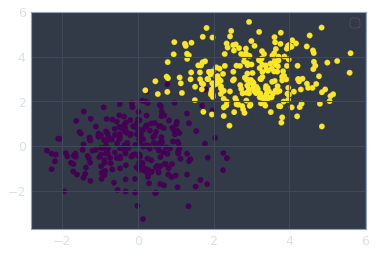

In [278]:
plt.scatter(x=X[:,0], y=X[:,1], c=label)
#plt.legend(loc='best')
plt.show()

<b>Exercise 4:</b>

Write a function 'find_best_split(x,y)' that gets two input vectors $x \in \mathbb{R}^d$ and $y \in \{0,1\}^d$. This function should return the threshold $t \in x$ with the best split. <b>Hint:</b> Use the function 'info_gain' from exercise 2.

In [279]:
def find_best_split(x,y):
    t_s = []
    for t_test in range(len(x)-1):
        gain = info_gain(x,y,t_test)
        t_s.append(gain)
    return np.argmax(t_s)
    

Check if your solution is correct:

In [280]:
try:
    assert find_best_split(np.array([1,2,3,4,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0])) == 5
    assert find_best_split(np.array([1,2,2,4,5,6,7,8,9,10]),np.array([1,1,0,0,1,0,0,1,0,0])) == 8    
    print("Testing successful.")
except:
    print("Tests failed.")

Testing successful.


<b>Exercise 5:</b>

* Find the best splitting for the two dimensions of the data set created in exercise 3. Plot the boundaries in a figure. Your figure should look like this:
<img src="figures/split.png" width="600"/>
* Which split would you prefer, and why?

In [284]:
x_best = find_best_split(X[:,0], label)
y_best = find_best_split(X[:,1], label)

print(x_best)
print(y_best)

6
6


## Train a Decision Tree
Now we train a decision tree using the sklearn package:

In [298]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=1)
fitted = clf_tree.fit(X, label)
fitted.predict(X)
fitted.score(X,label)
type(fitted.predict(X))

numpy.ndarray

In [308]:
missclassified = [point for ind,point in enumerate(X) if fitted.predict(X)[ind] != label[ind]]
missclassified = np.array(missclassified)
missclassified

array([[-1.42104794,  1.54441657],
       [ 0.2687129 ,  1.92770181],
       [ 0.63397837,  1.52984612],
       [-0.14009662,  1.74036855],
       [ 0.77893976,  2.76863735],
       [ 0.6132692 ,  1.77239592],
       [ 0.01976619,  1.52329199],
       [ 0.23466945,  2.43585126],
       [ 0.21131271,  1.9929252 ],
       [-0.15493809,  1.92108001],
       [ 1.97371832,  1.59010498],
       [ 0.11667641,  2.03510228],
       [-0.89601443,  1.72848626],
       [-0.47189738,  1.87923779],
       [ 1.70104814,  1.80893474],
       [ 0.57911687,  1.84334998],
       [ 0.96989046,  1.93262452],
       [ 1.29948481,  1.45542664],
       [ 1.78687458,  2.53647972],
       [ 2.26770754,  1.34684704],
       [ 2.41863875,  0.91160251],
       [ 3.80760385,  1.2831626 ],
       [ 4.20261559,  1.33033703],
       [ 3.78627632,  1.04752427],
       [ 4.85445452,  0.87705708]])

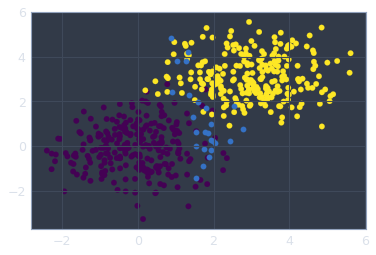

In [312]:
plt.scatter(x=X[:,0], y=X[:,1], c=label)
plt.scatter(x=missclassified[:,1], y=missclassified[:,0])
#plt.legend(loc='best')
plt.show()

<b>Exercise 6:</b>
* Calculate the predictions for all instances from the training set (use the function predict). Which instances are misclassified? Create a plot that shows which instances are correctly classified and which instances are misclassified. This figure should look like this:
<img src="figures/dec.png" width="600"/>
* Can you find learning parameter for the decision tree classifier (max_depth,min_samples_leaf,max_leaf_nodes,...) to get a classifier that classifies all instances correctly?